In [7]:
library(devtools)
load_all()

ℹ Loading ghostbasil


In [8]:
generate.data <- function(n, p)
{
    X <- matrix(rnorm(n * p), n, p)
    X <- scale(X) / sqrt(n-1)
    C <- t(X) %*% X
    beta <- rnorm(p)
    y <- X %*% beta + rnorm(n)
    y <- t(X) %*% y
    list(C=C, y=y)
}

In [9]:
set.seed(123)
n <- 800
p <- 1000
data <- generate.data(n, p)
C <- data$C
y <- data$y
lmda = 0.1
C.eig <- eigen(C, T)
Q = C.eig$vectors
L = C.eig$values
step_size = 1 / max(L)
print(step_size)
x = rep(0, p)

[1] 0.2255509


In [10]:
v <- t(Q) %*% y
out2 <- update_group_coeffs__(L, v, lmda, 0, max_iters=1000)
print(out2$iters)

[1] 6


In [11]:
beta <- as.numeric(Q %*% out2$beta)
nrm <- sqrt(sum(beta ** 2))
expected <- solve(C + lmda / nrm * diag(1, p, p), y)
print(sqrt(mean((expected-beta)**2)))

[1] 9.595524e-11


## How does PCD behave with warm-start?

In [169]:
data <- generate.data(900, 1000)
C <- data$C
y <- data$y
lmda.max <- max(y)
lmdas <- lmda.max * 1.5 ** (-(1:20))
step_size <- 1 / max(eigen(C, T, T)$values)

In [170]:
x <- rep(0, length(y))
for (lmda in lmdas[1:5]) {
    start <- Sys.time()
    out.tmp <- solve_sub_coeffs__(C, y, lmda, step_size, x, max_iters=10000, 1e-12)
    end <- Sys.time()
    print(end-start)
    x <- out.tmp$beta
}

Time difference of 0.009838581 secs
Time difference of 0.009563684 secs
Time difference of 0.01212811 secs
Time difference of 0.01510978 secs
Time difference of 0.01839399 secs


In [176]:
a = 1
b = 2
c = 0.01
d = 0.31
e = -1
x_roots <- solve_quartic__(a, b, c, d, e)

[1] 167
[1] -2.220446e-16


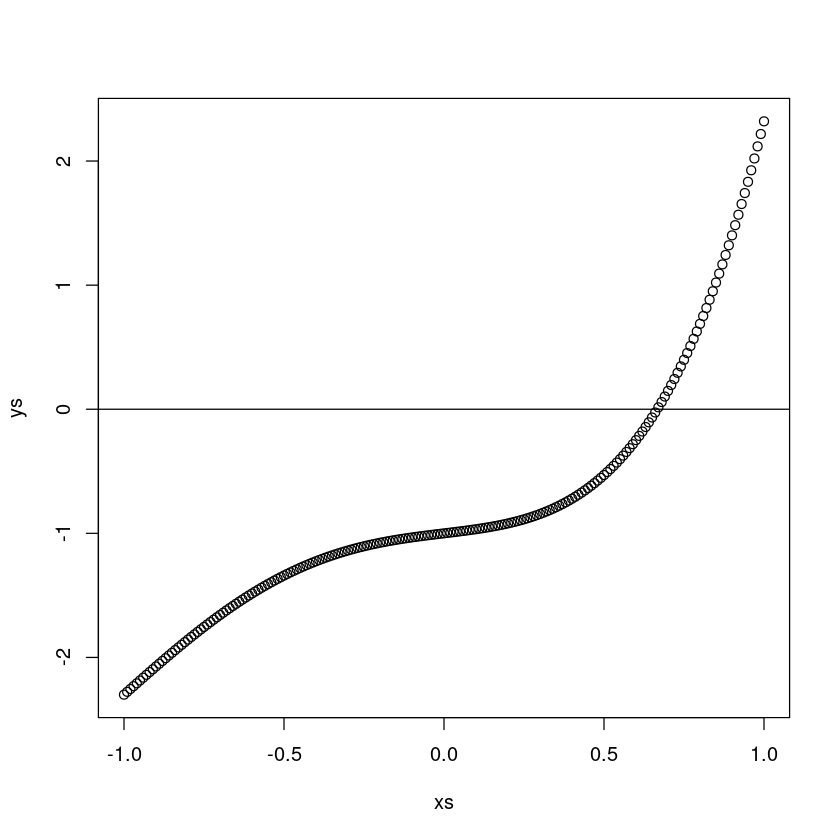

In [209]:
xs <- seq(-1, 1, 0.01)
quartic <- function(a,b,c,d,e,xs) {a * xs^4 + b * xs^3 + c * xs^2 + d * xs + e}
ys <- quartic(a,b,c,d,e,xs)
print(sum(ys < 0))
print(quartic(a,b,c,d,e,x_roots[2]))
plot(xs, ys)
abline(h=0)

In [210]:
sub_coord_desc <- function(a, b, c, d, x)
{
    x * (a + b / sqrt(x*x + c)) - d
}

In [254]:
a1 <- 1
b1 <- 0.1
c1 <- 8627.125123855891
d1 <- 0.1461198318242248
h <- solve_sub_coord_desc__(a1, b1, c1, d1)
print(h)
sub_coord_desc(a1, b1, c1, d1, h)

[1] NaN


[1] NaN